In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset from Hugging Face https://huggingface.co/datasets/uoft-cs/cifar10
dataset_cifar10 = load_dataset('cifar10')

In [ ]:
dataset_cifar10

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})

y = 1


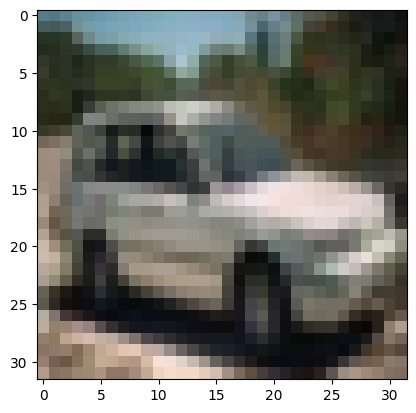

In [ ]:
# Access the training and test sets
train_set = dataset_cifar10['train']
test_set = dataset_cifar10['test']

# Convert the data into numpy arrays for consistency with your original code
train_set_x_orig = np.stack([np.array(item['img']) for item in train_set])
train_set_y = np.array([item['label'] for item in train_set])

test_set_x_orig = np.stack([np.array(item['img']) for item in test_set])
test_set_y = np.array([item['label'] for item in test_set])

# Example of a picture
index = 24
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[index]))

In [ ]:
train_set_x_orig.shape

(50000, 32, 32, 3)

In [ ]:
len(train_set_y)

50000

In [ ]:
# prompt: data transformation Reshape the training and test data ((50000, 32, 32, 3)) sets so that images are flattened into single vectors ((5000,32*32*3))

# Reshape the training and test examples
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (3072, 50000)
train_set_y shape: (50000,)
test_set_x_flatten shape: (3072, 10000)
test_set_y shape: (10000,)
sanity check after reshaping: [178 176 189 178 176]


In [ ]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [ ]:
# filter the data to keep only label 0 and 1 for the classification problem
train_set_x = train_set_x[:, train_set_y <= 1]
train_set_y = train_set_y[train_set_y <= 1]

In [ ]:
# same for test
test_set_x = test_set_x[:, test_set_y <= 1]
test_set_y = test_set_y[test_set_y <= 1]

In [ ]:
train_set_x.shape

(3072, 10000)

In [ ]:
# keep only 10% of the training data to speedup the process
new_size = int(train_set_x.shape[1] * 0.1)
train_set_x = train_set_x[:, :new_size]
train_set_y = train_set_y[:new_size]

In [ ]:
train_set_x.shape

(3072, 1000)

In [ ]:
train_set_y.shape

(1000,)

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [ ]:
# init your weights and variables
w_it=np.random.rand(train_set_x.shape[0],1)*0.01
b_it=0
cost_values = []
alpha = 0.01

In [ ]:
def forward(w, b, X, Y):
  Z = np.dot(w.T, X) + b
  A = sigmoid(Z)
  m=X.shape[1]
  cost = -1/m * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))
  return A, cost

In [ ]:
def backward(w, b, X, Y, A):
  m = X.shape[1]  # number of examples
  delta_w = np.dot(X, (A - Y).T) / m
  delta_b = np.sum(A - Y) / m
  new_w = w - alpha * delta_w
  new_b = b - alpha * delta_b
  return new_w, new_b

In [ ]:
#forward(w_it, b_it, train_set_x, train_set_y)

In [ ]:
# run a loop of 100 steps using backward and forward and plot the cost function
for i in range(1000):
  predictions, cost = forward(w_it, b_it, train_set_x, train_set_y)
  w_it, b_it = backward(w_it, b_it, train_set_x, train_set_y, predictions)
  cost_values.append(cost)

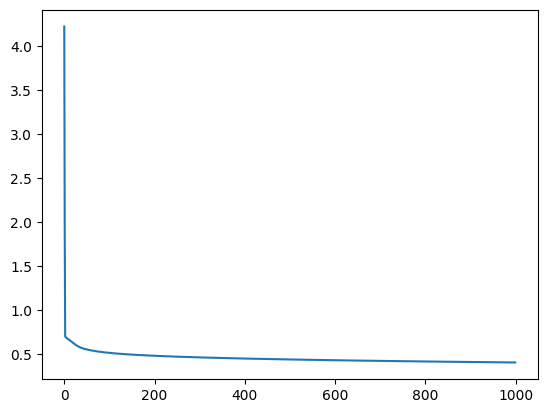

In [ ]:
#plot cost_values
import matplotlib.pyplot as plt
plt.plot(cost_values)

In [ ]:
# prompt: compute accuracy on test dataset

# Convert probabilities to class labels (0 or 1)
predictions = forward(w_it, b_it, test_set_x, test_set_y)[0]
predictions_labels = (predictions > 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(predictions_labels == test_set_y)
print(f"Accuracy on test dataset: {accuracy}")

Accuracy on test dataset: 0.787
